In [1]:
import asyncio, signal, socket
from websockets import server, exceptions
# websockets.exceptions.ConnectionClosed

HOST, PORT = '127.0.0.1', 8765

try:
    sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    sock.connect(('8.8.8.8', 1)) # doesn't even have to be reachable
    HOST = sock.getsockname()[0]
except Exception as error: print(error)
finally: sock.close()

def lines(a): return a.split('\n')

In [ ]:
def mapRr1024ToRrMs(rrsRaw):
    return round((rrsRaw / 1024.0) * 1000.0)

class PolarWSServer:

    def __init__(self):
        self.doexit = False
        signal.signal(signal.SIGINT, self.sighandler)
        signal.signal(signal.SIGTERM, self.sighandler)

    def sighandler(self, *args):
        self.doexit = True

    async def shutdown(self, fut, interval=1):
        while not self.doexit: await asyncio.sleep(interval)
        fut.set_result(None) # Mark future as done with None result

    async def echo(self, websocket):
        try:
            async for message in websocket:
                await websocket.send(message)
                print(message)
        except exceptions.ConnectionClosed as exc:
            print(exc)


    async def wss_handler(self, websocket):
        try:
            async for message in websocket:
                self.print_ble_data(message)
        except exceptions.ConnectionClosed as exc:
            print(exc)

    def print_ble_data(self, data): #{
        hrFormat = data[0] & 0x01
        sensorContact = ((data[0] & 0x06) >> 1) == 0x03
        contactSupported = (data[0] & 0x04) != 0
        energyExpended = (data[0] & 0x08) >> 3
        rrPresent = (data[0] & 0x10) >> 4
        
        if hrFormat == 0: hrValue = data[1] & 0x000000FF
        else: hrValue = ((data[1] & 0xFF) + (data[2] << 8)) & 0x0000FFFF
            
        energy = 0
        offset = hrFormat + 2
        if energyExpended == 1:
            energy = (data[offset] & 0xFF) + ((data[offset + 1] & 0xFF) << 8)
            offset += 2
        
        rrs, rrsMs = [], []
        if (rrPresent == 1):
            while (offset < len(data)):
                rrValue = (data[offset] & 0xFF) + ((data[offset + 1] & 0xFF) << 8)
                offset += 2
                rrs.append(rrValue)
                rrsMs.append(mapRr1024ToRrMs(rrValue))
        
        print(f'{hrFormat}, {sensorContact}, {contactSupported}, {energyExpended}, {rrPresent}, {hrValue}, {rrs}, {rrsMs}, {energy}')
    #}
    
    async def run(self):
        async with server.serve(self.wss_handler, host=HOST, port=PORT):
            print(f'Serving at: ws://{HOST}:{PORT}')
            loop = asyncio.get_running_loop()
            fut = loop.create_future()
            loop.create_task(self.shutdown(fut))
            await fut # run forever or until SIGNAL

wsserver = PolarWSServer()
await wsserver.run()

In [38]:
a = """0, False, False, 0, 1, 68, [927], [905], 0
0, False, False, 0, 1, 68, [945], [923], 0
0, False, False, 0, 1, 68, [933], [911], 0
0, False, False, 0, 1, 68, [915], [894], 0
0, False, False, 0, 1, 67, [926, 938], [904, 916], 0
0, False, False, 0, 1, 67, [954], [932], 0
0, False, False, 0, 1, 67, [954], [932], 0
0, False, False, 0, 1, 67, [926], [904], 0
0, False, False, 0, 1, 67, [905], [884], 0
0, False, False, 0, 1, 67, [870], [850], 0
0, False, False, 0, 1, 67, [849, 832], [829, 812], 0
0, False, False, 0, 1, 68, [886], [865], 0
0, False, False, 0, 1, 68, [924], [902], 0
0, False, False, 0, 1, 68, [955], [933], 0
0, False, False, 0, 1, 68, [912], [891], 0
0, False, False, 0, 1, 68, [927], [905], 0
0, False, False, 0, 1, 68, [939], [917], 0
0, False, False, 0, 1, 67, [965], [942], 0
0, False, False, 0, 1, 67, [973], [950], 0
0, False, False, 0, 1, 67, [995], [972], 0
0, False, False, 0, 1, 66, [982], [959], 0
0, False, False, 0, 1, 66, [905, 877], [884, 856], 0
0, False, False, 0, 1, 66, [857], [837], 0
0, False, False, 0, 1, 67, [903], [882], 0
0, False, False, 0, 1, 67, [935], [913], 0
0, False, False, 0, 1, 67, [894], [873], 0
0, False, False, 0, 1, 67, [944], [922], 0
0, False, False, 0, 1, 67, [940], [918], 0
0, False, False, 0, 1, 67, [974], [951], 0
0, False, False, 0, 1, 67, [972], [949], 0
0, False, False, 0, 1, 66, [915, 882], [894, 861], 0
0, False, False, 0, 1, 66, [851], [831], 0
0, False, False, 0, 1, 67, [882], [861], 0
0, False, False, 0, 1, 67, [852], [832], 0
0, False, False, 0, 1, 68, [928], [906], 0
0, False, False, 0, 1, 68, [960], [938], 0
0, False, False, 0, 1, 67, [909, 841], [888, 821], 0
0, False, False, 0, 1, 68, [778], [760], 0
0, False, False, 0, 1, 68, [767], [749], 0
0, False, False, 0, 1, 70, [754], [736], 0
0, False, False, 0, 1, 71, [812], [793], 0
0, False, False, 0, 1, 71, [926, 1014], [904, 990], 0
0, False, False, 0, 1, 71, [932], [910], 0
0, False, False, 0, 1, 70, [874], [854], 0
0, False, False, 0, 1, 70, [806, 762], [787, 744], 0
0, False, False, 0, 1, 71, [727], [710], 0
0, False, False, 0, 1, 72, [722], [705], 0
0, False, False, 0, 1, 74, [761, 762], [743, 744], 0
0, False, False, 0, 1, 75, [769], [751], 0
0, False, False, 0, 1, 75, [801], [782], 0
0, False, False, 0, 1, 76, [908], [887], 0
0, False, False, 0, 1, 75, [1018], [994], 0
0, False, False, 0, 1, 74, [971], [948], 0
0, False, False, 0, 1, 73, [839, 795], [819, 776], 0
0, False, False, 0, 1, 73, [754], [736], 0
0, False, False, 0, 1, 74, [728, 709], [711, 692], 0
0, False, False, 0, 1, 76, [701], [685], 0
0, False, False, 0, 1, 77, [698], [682], 0
0, False, False, 0, 1, 78, [694], [678], 0
0, False, False, 0, 1, 79, [726], [709], 0
0, False, False, 0, 1, 80, [829], [810], 0
0, False, False, 0, 1, 78, [1081, 993], [1056, 970], 0
0, False, False, 0, 1, 73, [970], [947], 0
0, False, False, 0, 1, 72, [876], [855], 0
0, False, False, 0, 1, 71, [827, 775], [808, 757], 0
0, False, False, 0, 1, 72, [742], [725], 0
0, False, False, 0, 1, 73, [715], [698], 0
0, False, False, 0, 1, 74, [704], [688], 0
0, False, False, 0, 1, 75, [712], [695], 0
0, False, False, 0, 1, 76, [879], [858], 0
0, False, False, 0, 1, 77, [1228], [1199], 0
0, False, False, 0, 1, 73, [1068], [1043], 0
0, False, False, 0, 1, 70, [1081], [1056], 0
0, False, False, 0, 1, 68, [1080], [1055], 0
0, False, False, 0, 1, 67, [1081], [1056], 0
0, False, False, 0, 1, 66, [960], [938], 0
0, False, False, 0, 1, 65, [873], [853], 0
0, False, False, 0, 1, 66, [869], [849], 0
0, False, False, 0, 1, 66, [901], [880], 0
0, False, False, 0, 1, 66, [1137], [1110], 0
0, False, False, 0, 1, 66, [1085], [1060], 0
0, False, False, 0, 1, 64, [1019, 979], [995, 956], 0
0, False, False, 0, 1, 64, [931], [909], 0
0, False, False, 0, 1, 64, [899], [878], 0
0, False, False, 0, 1, 64, [828], [809], 0
0, False, False, 0, 1, 65, [797], [778], 0
0, False, False, 0, 1, 66, [805], [786], 0
0, False, False, 0, 1, 67, [873], [853], 0
0, False, False, 0, 1, 68, [1246], [1217], 0
0, False, False, 0, 1, 67, [1188], [1160], 0
0, False, False, 0, 1, 65, [1116], [1090], 0
0, False, False, 0, 1, 64, [1111], [1085], 0
0, False, False, 0, 1, 63, [1083], [1058], 0
0, False, False, 0, 1, 63, [1051], [1026], 0
0, False, False, 0, 1, 62, [879, 803], [858, 784], 0
0, False, False, 0, 1, 63, [765], [747], 0
0, False, False, 0, 1, 65, [752], [734], 0
0, False, False, 0, 1, 66, [741], [724], 0
0, False, False, 0, 1, 68, [789], [771], 0
0, False, False, 0, 1, 69, [1225], [1196], 0
0, False, False, 0, 1, 69, [1128], [1102], 0
0, False, False, 0, 0, 69, [], [], 0
0, False, False, 0, 1, 67, [1145], [1118], 0
0, False, False, 0, 1, 66, [1139], [1112], 0
0, False, False, 0, 1, 64, [1088, 1077], [1062, 1052], 0
0, False, False, 0, 1, 63, [978], [955], 0
0, False, False, 0, 1, 63, [856], [836], 0
0, False, False, 0, 1, 63, [817], [798], 0
0, False, False, 0, 1, 64, [840], [820], 0
0, False, False, 0, 1, 65, [1235], [1206], 0
0, False, False, 0, 1, 65, [1125], [1099], 0
0, False, False, 0, 0, 65, [], [], 0
0, False, False, 0, 1, 64, [1112], [1086], 0
0, False, False, 0, 1, 63, [1116], [1090], 0
0, False, False, 0, 1, 61, [1097, 1059], [1071, 1034], 0
0, False, False, 0, 1, 61, [962], [939], 0
0, False, False, 0, 1, 61, [861], [841], 0
0, False, False, 0, 1, 62, [790], [771], 0
0, False, False, 0, 1, 63, [793], [774], 0
0, False, False, 0, 1, 64, [826], [807], 0
0, False, False, 0, 1, 65, [1201], [1173], 0
0, False, False, 0, 1, 65, [1148], [1121], 0
0, False, False, 0, 1, 64, [1104], [1078], 0
0, False, False, 0, 1, 63, [1123], [1097], 0
0, False, False, 0, 1, 62, [1100], [1074], 0
0, False, False, 0, 1, 62, [1004], [980], 0
0, False, False, 0, 1, 62, [796, 769], [777, 751], 0
0, False, False, 0, 1, 64, [763], [745], 0
0, False, False, 0, 1, 65, [773], [755], 0
0, False, False, 0, 1, 67, [777], [759], 0
0, False, False, 0, 1, 68, [807], [788], 0
0, False, False, 0, 1, 69, [962], [939], 0
0, False, False, 0, 1, 69, [1244], [1215], 0
0, False, False, 0, 1, 68, [1081], [1056], 0
0, False, False, 0, 1, 66, [1024], [1000], 0
0, False, False, 0, 1, 66, [989], [966], 0
0, False, False, 0, 1, 65, [913, 898], [892, 877], 0
0, False, False, 0, 1, 65, [892], [871], 0
0, False, False, 0, 1, 66, [897], [876], 0
0, False, False, 0, 1, 66, [946], [924], 0
0, False, False, 0, 1, 66, [972], [949], 0
0, False, False, 0, 1, 66, [983], [960], 0
0, False, False, 0, 1, 66, [991], [968], 0
0, False, False, 0, 1, 65, [934], [912], 0
0, False, False, 0, 1, 65, [916], [895], 0
0, False, False, 0, 1, 65, [896], [875], 0
0, False, False, 0, 1, 65, [922], [900], 0
0, False, False, 0, 1, 66, [978], [955], 0
0, False, False, 0, 1, 66, [1055], [1030], 0
0, False, False, 0, 1, 65, [1083], [1058], 0
0, False, False, 0, 1, 64, [1063], [1038], 0
0, False, False, 0, 1, 64, [991], [968], 0
0, False, False, 0, 1, 63, [959], [937], 0
0, False, False, 0, 1, 63, [944], [922], 0
0, False, False, 0, 1, 63, [958], [936], 0
0, False, False, 0, 1, 63, [1003], [979], 0
0, False, False, 0, 1, 63, [1043], [1019], 0
0, False, False, 0, 1, 63, [1035], [1011], 0
0, False, False, 0, 1, 62, [1018, 952], [994, 930], 0
0, False, False, 0, 1, 62, [906], [885], 0
0, False, False, 0, 1, 63, [882], [861], 0
0, False, False, 0, 1, 63, [883], [862], 0
0, False, False, 0, 1, 64, [962], [939], 0
0, False, False, 0, 1, 64, [1183], [1155], 0
0, False, False, 0, 0, 64, [], [], 0
0, False, False, 0, 1, 63, [1090, 1100], [1064, 1074], 0
0, False, False, 0, 1, 62, [1022], [998], 0
0, False, False, 0, 1, 62, [983], [960], 0
0, False, False, 0, 1, 62, [957], [935], 0
0, False, False, 0, 1, 62, [985], [962], 0
0, False, False, 0, 1, 62, [1004], [980], 0
0, False, False, 0, 1, 62, [1033], [1009], 0
0, False, False, 0, 1, 62, [1056], [1031], 0
0, False, False, 0, 1, 61, [1065], [1040], 0
0, False, False, 0, 1, 61, [1050], [1025], 0
0, False, False, 0, 1, 61, [964], [941], 0
0, False, False, 0, 1, 61, [934], [912], 0
0, False, False, 0, 1, 61, [939], [917], 0
0, False, False, 0, 1, 62, [935], [913], 0
0, False, False, 0, 1, 62, [973], [950], 0
0, False, False, 0, 1, 62, [1009], [985], 0
0, False, False, 0, 1, 62, [1065], [1040], 0
0, False, False, 0, 1, 62, [975], [952], 0
0, False, False, 0, 1, 62, [898], [877], 0
0, False, False, 0, 1, 62, [866], [846], 0
0, False, False, 0, 1, 63, [870], [850], 0
0, False, False, 0, 1, 64, [943], [921], 0
0, False, False, 0, 1, 64, [1225], [1196], 0
0, False, False, 0, 1, 63, [1122], [1096], 0
0, False, False, 0, 1, 62, [1122], [1096], 0
0, False, False, 0, 1, 62, [1048], [1023], 0
0, False, False, 0, 1, 61, [984], [961], 0
0, False, False, 0, 1, 61, [952], [930], 0
0, False, False, 0, 1, 61, [933], [911], 0
0, False, False, 0, 1, 62, [937], [915], 0
0, False, False, 0, 1, 62, [950, 979], [928, 956], 0
0, False, False, 0, 1, 63, [1008], [984], 0
0, False, False, 0, 1, 62, [986], [963], 0
0, False, False, 0, 1, 62, [938], [916], 0
0, False, False, 0, 1, 63, [904], [883], 0
0, False, False, 0, 1, 63, [869], [849], 0
0, False, False, 0, 1, 64, [869], [849], 0
0, False, False, 0, 1, 64, [916], [895], 0
0, False, False, 0, 1, 65, [1040], [1016], 0
0, False, False, 0, 1, 65, [1059], [1034], 0
0, False, False, 0, 1, 64, [1128], [1102], 0
0, False, False, 0, 1, 63, [1070], [1045], 0
0, False, False, 0, 1, 62, [1040], [1016], 0
0, False, False, 0, 1, 62, [975], [952], 0
0, False, False, 0, 1, 62, [898, 852], [877, 832], 0
0, False, False, 0, 1, 63, [830], [811], 0
0, False, False, 0, 0, 63, [], [], 0
0, False, False, 0, 1, 64, [855], [835], 0
0, False, False, 0, 1, 65, [937], [915], 0
0, False, False, 0, 1, 65, [1274], [1244], 0
0, False, False, 0, 1, 65, [1143], [1116], 0
0, False, False, 0, 1, 63, [1078], [1053], 0
0, False, False, 0, 1, 62, [1035, 979], [1011, 956], 0
0, False, False, 0, 1, 62, [930], [908], 0
0, False, False, 0, 1, 62, [897], [876], 0
0, False, False, 0, 1, 63, [868], [848], 0
0, False, False, 0, 1, 63, [885], [864], 0
0, False, False, 0, 1, 64, [991], [968], 0
0, False, False, 0, 1, 64, [1116], [1090], 0
0, False, False, 0, 1, 64, [1107], [1081], 0
0, False, False, 0, 1, 63, [1070], [1045], 0
0, False, False, 0, 1, 62, [1052], [1027], 0
0, False, False, 0, 1, 62, [990], [967], 0
0, False, False, 0, 1, 62, [939], [917], 0
0, False, False, 0, 1, 62, [895], [874], 0
0, False, False, 0, 1, 62, [850], [830], 0
0, False, False, 0, 1, 63, [833], [813], 0
0, False, False, 0, 1, 64, [895], [874], 0
0, False, False, 0, 1, 65, [1020], [996], 0
0, False, False, 0, 1, 65, [1163], [1136], 0
0, False, False, 0, 1, 64, [1151], [1124], 0
0, False, False, 0, 1, 63, [1051], [1026], 0
0, False, False, 0, 1, 62, [1017], [993], 0
0, False, False, 0, 1, 62, [960, 883], [938, 862], 0
0, False, False, 0, 1, 62, [817], [798], 0
0, False, False, 0, 1, 63, [791], [772], 0
0, False, False, 0, 1, 65, [816], [797], 0
0, False, False, 0, 1, 66, [972], [949], 0
0, False, False, 0, 0, 66, [], [], 0
0, False, False, 0, 1, 66, [1311], [1280], 0
0, False, False, 0, 1, 64, [1142, 1077], [1115, 1052], 0
0, False, False, 0, 1, 63, [1059], [1034], 0
0, False, False, 0, 1, 62, [922], [900], 0
0, False, False, 0, 1, 62, [856], [836], 0
0, False, False, 0, 1, 64, [832, 814], [812, 795], 0
0, False, False, 0, 1, 65, [784], [766], 0
0, False, False, 0, 1, 66, [754], [736], 0
0, False, False, 0, 1, 69, [757, 760], [739, 742], 0
0, False, False, 0, 1, 70, [801], [782], 0
0, False, False, 0, 1, 71, [847], [827], 0
0, False, False, 0, 1, 72, [792, 747], [773, 729], 0
0, False, False, 0, 1, 73, [730], [713], 0
0, False, False, 0, 1, 76, [711, 588], [694, 574], 0
0, False, False, 0, 1, 79, [809, 532], [790, 520], 0
0, False, False, 0, 0, 79, [], [], 0
0, False, False, 0, 1, 80, [483], [472], 0
0, False, False, 0, 1, 81, [1263], [1233], 0
0, False, False, 0, 1, 81, [874], [854], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 81, [], [], 0
0, False, False, 0, 0, 0, [], [], 0
0, False, False, 0, 0, 0, [], [], 0"""

import re

tbeats = []
bpm_reported = []
for ln in lines(a):
    matchobj = re.match(r'0, False, False, 0, \d, (\d+), \[[\d\s,]*\], \[([\d\s,]*)\], 0', ln)
    bpm_reported.append(int(matchobj.group(1)))
    for rrsMs in [int(v) for v in matchobj.group(2).split(',') if v]: 
        tbeats.append(rrsMs)
    
    # rrsMs = ln.split((', '))[7]
    # rrsMs.replace('[', '').replace(']', '').split()

# print(int(matchobj.group(1)), nbeats * 60000 // tdeltaMs, rrsarray)


bpm_measured = []
winsize = 9
halfwin = winsize//2 + 1
window = sum(tbeats[:winsize])
for i in range(len(bpm_reported)):
    if (i-halfwin) >= 0: window = window - tbeats[i-halfwin] + tbeats[i+halfwin]
    bpm_measured.append(winsize*60000//window)

Text(0.5, 1.0, 'Sine wave')

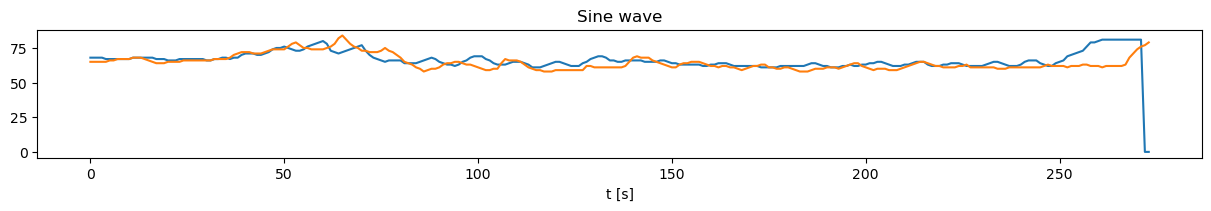

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, len(bpm_reported))

fig, ax = plt.subplots(figsize=(12,2), constrained_layout=True)
ax.plot(x, bpm_reported)
ax.plot(x, bpm_measured)

ax.set_xlabel('t [s]')
ax.set_title('Sine wave')
# fig.set_facecolor('lightsteelblue')


In [ ]:
# Python 3 server example
# import http.server
# import socketserver

# Handler = http.server.SimpleHTTPRequestHandler
# with socketserver.TCPServer(("", PORT), Handler) as httpd:
#     print(f"Serving at: http://192.168.0.12:{PORT}")
#     try: httpd.serve_forever()
#     except KeyboardInterrupt: pass

# print("Server stopped")